In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import scienceplots
plt.style.use(['science', 'notebook'])


# An initial problem
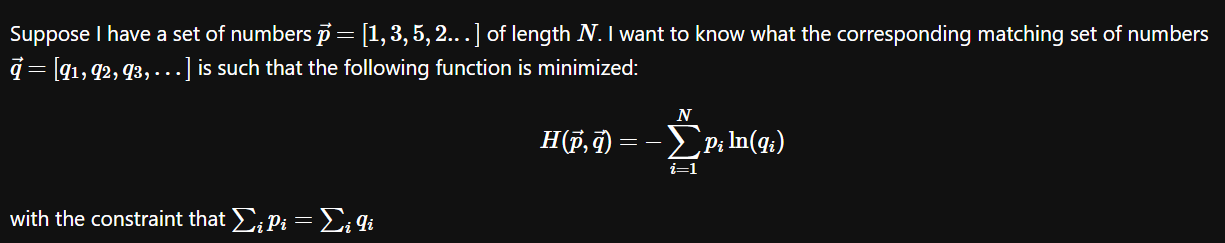

In [2]:
p = np.array([5,1,4,6,2,4])
q1 = p
q2 = np.array([3,7,1,4,1,6])
q3 = np.array([2,5,7,2,1,5])

In [3]:
-sum(p * np.log(q1))

-31.27439562761785

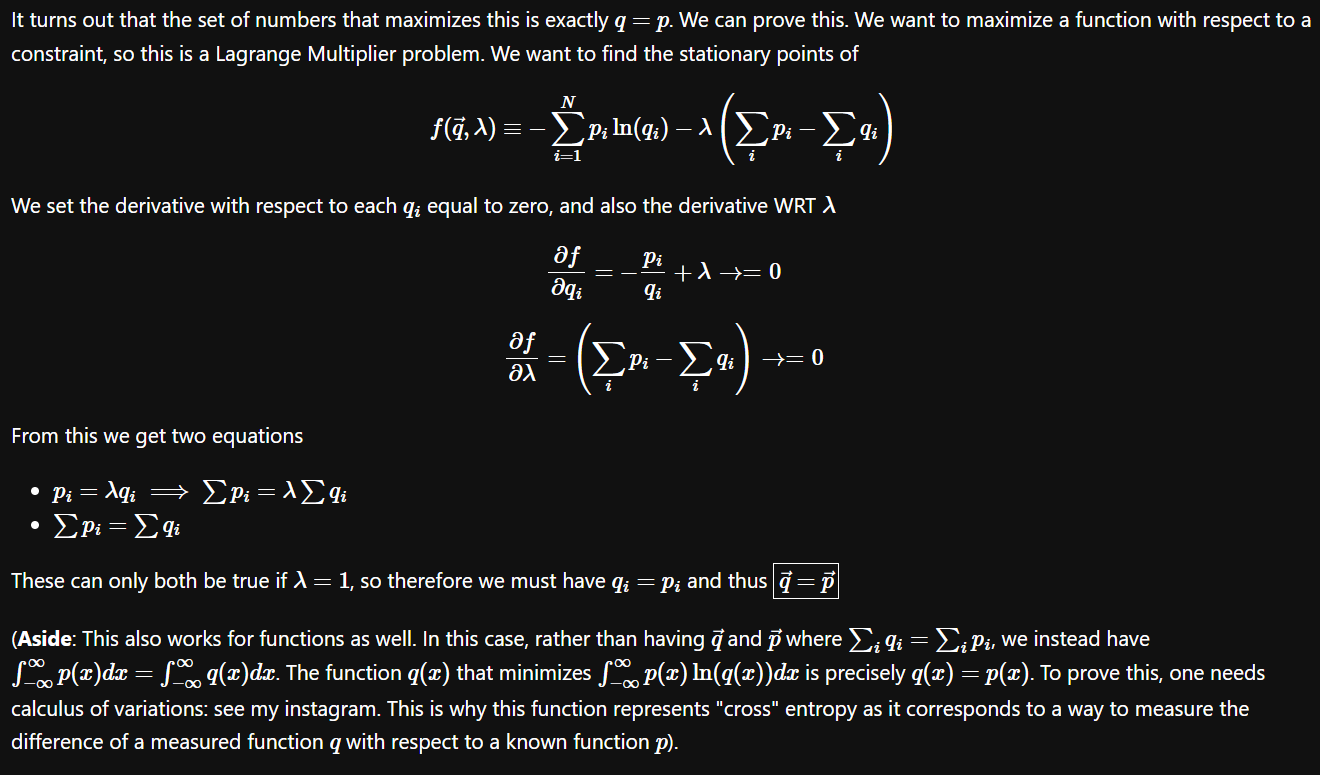

# Cross Entropy Loss
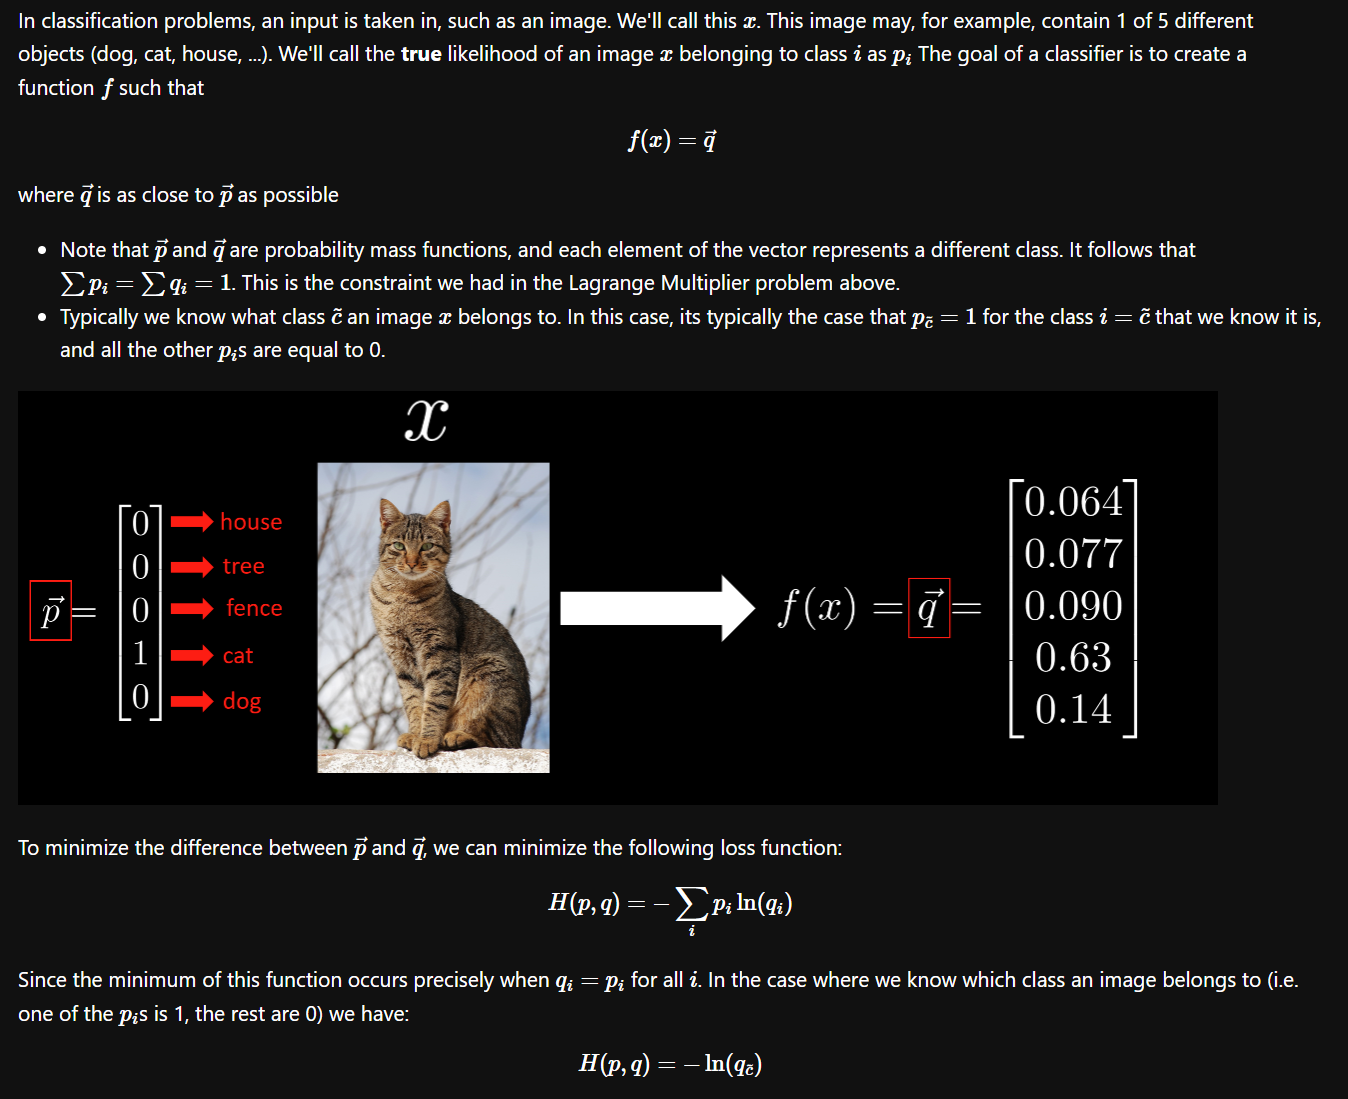

In [4]:
p = np.zeros(10, dtype=int); p[4]=1
q = np.random.randn(10)
q = q/sum(q) #probabilities

In [5]:
p

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [6]:
q

array([ 0.01864563,  0.31762589, -0.03647951,  0.22171364, -0.15127656,
        0.24403615,  0.01573876, -0.16195511,  0.33444537,  0.19750575])

In [7]:
p>0

array([False, False, False, False,  True, False, False, False, False,
       False])

In [8]:
H = -np.log(q[p>0])
H

C:\Users\Sandesh\AppData\Local\Temp\ipykernel_23540\2040953284.py:1: RuntimeWarning: invalid value encountered in log
  H = -np.log(q[p>0])


array([nan])

What if we make the probability higher at this point?

In [9]:
q[4] = 20
q = q/sum(q) #renormalize
H = -np.log(q[p>0])
H # cross entropy gets smaller, lesser the entropy, lesser the chaos

array([0.05596799])

In [10]:
q

array([ 8.81536772e-04,  1.50168660e-02, -1.72469546e-03,  1.04822815e-02,
        9.45569406e-01,  1.15376558e-02,  7.44104542e-04, -7.65698990e-03,
        1.58120656e-02,  9.33776958e-03])

What if we change other locations?

In [11]:
q[3] = 0
q = q/sum(q) #renormalize
H = -np.log(q[p==1])
H

array([0.04543038])

In [12]:
q

array([ 8.90875177e-04,  1.51759445e-02, -1.74296572e-03,  0.00000000e+00,
        9.55586128e-01,  1.16598780e-02,  7.51987083e-04, -7.73810288e-03,
        1.59795679e-02,  9.43668760e-03])

# For Multiple Images
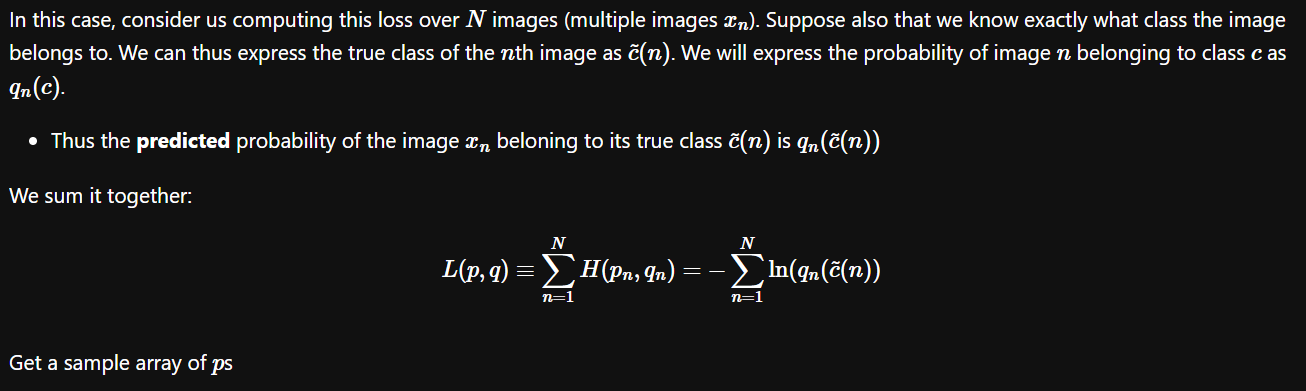
$\hat c$=index of the true class. eg. in [0 0 0 1 0], $\hat c$ = 3,  $q_n(\hat c (n))$ is the 
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;
probability of belonging to the true class

In [13]:
p = np.zeros((4,10), dtype=int)
p[0][4] = 1
p[1][2] = 1
p[2][8] = 1
p[3][6] = 1

In [14]:
p

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

Create probability of array of qs:

In [15]:
q = np.random.randn(40).reshape(4,10)
q = q/np.expand_dims(np.sum(q, axis = 1 ), axis = 1)

In [16]:
q

array([[-0.02063517, -0.00302433,  0.3244424 ,  0.26327682, -0.05493308,
        -0.52331143, -0.17114439,  0.17694296,  0.02011458,  0.98827164],
       [ 0.01505307,  0.18785769, -1.1095782 ,  1.01651252,  0.57057475,
         0.89190233, -2.54187141,  0.10388222,  1.17698733,  0.68867969],
       [ 0.11731267, -0.28254539, -0.05070682, -0.07184236,  0.08361963,
        -0.4270498 ,  0.58960876,  0.36587082, -0.4921078 ,  1.16784029],
       [-0.01094688,  0.0275751 ,  0.14163809,  0.2025354 ,  0.05238153,
         0.07678667,  0.2346164 ,  0.1034875 ,  0.050719  ,  0.12120719]])

Compute **H** for each term in the sum and then sum together tyo get **L**:

In [17]:
q[p>0]

array([-0.05493308, -1.1095782 , -0.4921078 ,  0.2346164 ])

In [18]:
Hs = -np.log(q[p>0])
L = sum(Hs)

C:\Users\Sandesh\AppData\Local\Temp\ipykernel_23540\2123113755.py:1: RuntimeWarning: invalid value encountered in log
  Hs = -np.log(q[p>0])


In [19]:
Hs

array([       nan,        nan,        nan, 1.44980342])

In [20]:
L

nan

# How do we get the q's in Machine Learning?
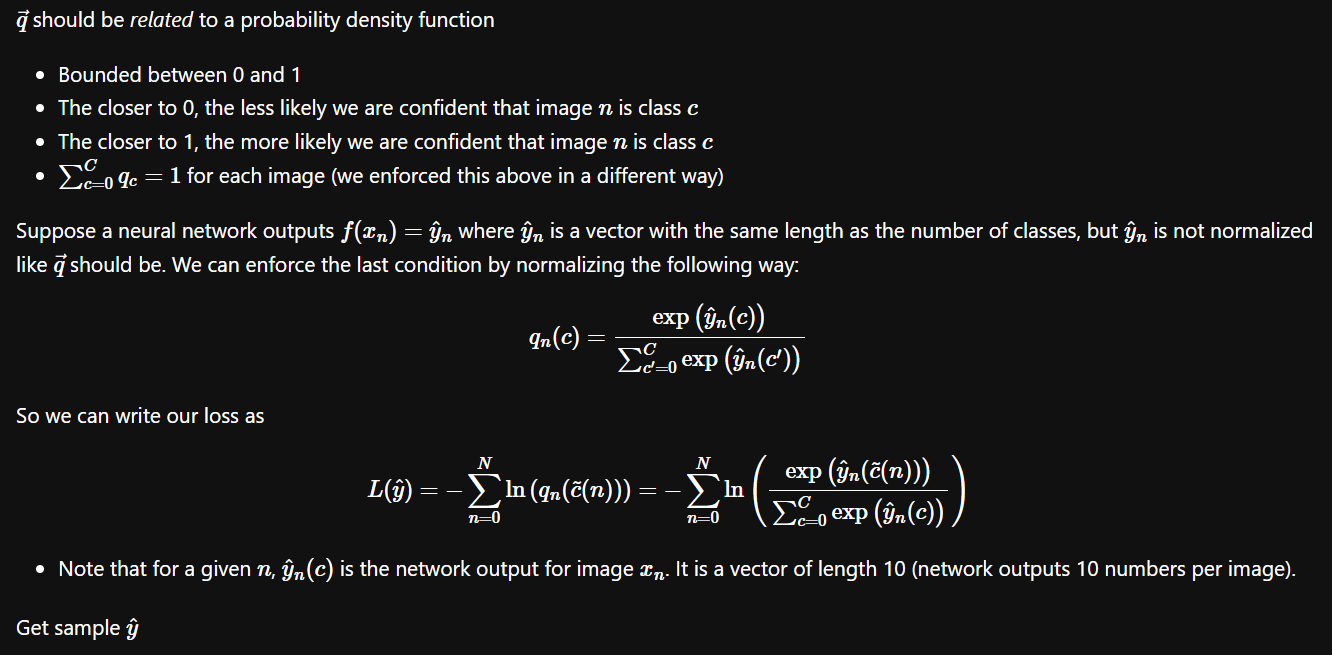

In [21]:
yhat = 20 * np.random.randn(40).reshape(4,10)**2

In [22]:
yhat

array([[2.24614655e+01, 3.71101608e+00, 1.37606677e+01, 1.51294170e+00,
        9.90555289e+00, 4.09252944e-02, 3.15803248e+00, 7.33483739e+00,
        1.98048632e+01, 5.41334952e+01],
       [2.56966895e+01, 7.63524716e+00, 9.00579851e+00, 3.57785584e+01,
        4.22308930e+00, 3.80920686e+00, 2.22778386e+00, 1.15727589e-01,
        9.62104085e-01, 8.21999910e+01],
       [1.00640811e+01, 2.05142155e+00, 2.09849155e+01, 1.69737392e+00,
        4.50632491e-01, 3.79696863e-01, 4.21906242e+00, 2.24186350e-01,
        1.37557923e-03, 2.62679563e+01],
       [6.88585425e+00, 1.81443531e+01, 2.47423608e-01, 1.25303564e+01,
        5.36426978e+00, 3.39463118e+00, 8.81049237e+00, 2.97687782e-01,
        2.12404476e+00, 3.74416960e+00]])

The first axis is w.r.t. $n$, the second axis is w.r.t. $C$.

In [23]:
yhat.shape

(4, 10)

Compute the $q$s from the exponential fraction above. <br>
* This is a bit tricky.

In [24]:
q = np.exp(yhat)
q

array([[5.68709523e+09, 4.08953384e+01, 9.46633913e+05, 4.54006670e+00,
        2.00413494e+04, 1.04177428e+00, 2.35242659e+01, 1.53277852e+03,
        3.99156145e+08, 3.23502949e+23],
       [1.44520833e+11, 2.06988258e+03, 8.15020623e+03, 3.45486021e+15,
        6.82439851e+01, 4.51146425e+01, 9.27927906e+00, 1.12269000e+00,
        2.61719749e+00, 5.00037440e+35],
       [2.34841525e+04, 7.77895141e+00, 1.29907134e+09, 5.45959125e+00,
        1.56930444e+00, 1.46184138e+00, 6.79697272e+01, 1.25130418e+00,
        1.00137653e+00, 2.55875366e+11],
       [9.78337059e+02, 7.58564345e+07, 1.28072152e+00, 2.76607937e+05,
        2.13635177e+02, 2.98036594e+01, 6.70421944e+03, 1.34674125e+00,
        8.36490322e+00, 4.22738883e+01]])

In [25]:
np.sum(q, axis = 1) 

array([3.23502949e+23, 5.00037440e+35, 2.57174461e+11, 7.61410217e+07])

In [26]:
np.sum(q, axis = 1).shape

(4,)

Need to divide each row by corresponding normalization factor. so we need to expand dims of q to change the shape from (4,) to (4,1).

In [27]:
np.expand_dims(np.sum(q, axis = 1), axis = 1).shape

(4, 1)

In [28]:
q = q / np.expand_dims(np.sum(q, axis = 1), axis = 1)

In [29]:
q

array([[1.75797323e-14, 1.26414113e-22, 2.92619871e-18, 1.40340813e-23,
        6.19510562e-20, 3.22029298e-24, 7.27173151e-23, 4.73806661e-21,
        1.23385628e-15, 1.00000000e+00],
       [2.89020025e-25, 4.13945521e-33, 1.62991920e-32, 6.90920306e-21,
        1.36477751e-34, 9.02225291e-35, 1.85571686e-35, 2.24521187e-36,
        5.23400306e-36, 1.00000000e+00],
       [9.13160365e-08, 3.02477601e-11, 5.05132328e-03, 2.12291346e-11,
        6.10210063e-12, 5.68424009e-12, 2.64294234e-10, 4.86558491e-12,
        3.89376348e-12, 9.94948585e-01],
       [1.28490141e-05, 9.96262367e-01, 1.68203879e-08, 3.63283721e-03,
        2.80578290e-06, 3.91427100e-07, 8.80500325e-05, 1.76874596e-08,
        1.09860664e-07, 5.55205161e-07]])

Show they are normalized

In [30]:
q.sum(axis=1)

array([1., 1., 1., 1.])

Calculate $\tilde c(n)$:<br>
* Again this is tricky

In [31]:
c_squig = np.where(p)
c_squig

(array([0, 1, 2, 3], dtype=int64), array([4, 2, 8, 6], dtype=int64))

Compute the loss function:

In [32]:
q[c_squig]

array([6.19510562e-20, 1.62991920e-32, 3.89376348e-12, 8.80500325e-05])

In [33]:
Hs = -np.log(q[c_squig])
L = sum(Hs)
L

153.03138513355825

# Proof this is equivalent to PyTorch

Create Loss Function

In [34]:
L = torch.nn.CrossEntropyLoss(reduction='sum')

Evaluate on data above:

In [35]:
L(torch.tensor(yhat),torch.tensor(p,dtype=torch.float))

tensor(153.0314, dtype=torch.float64)

# Image Segmentation
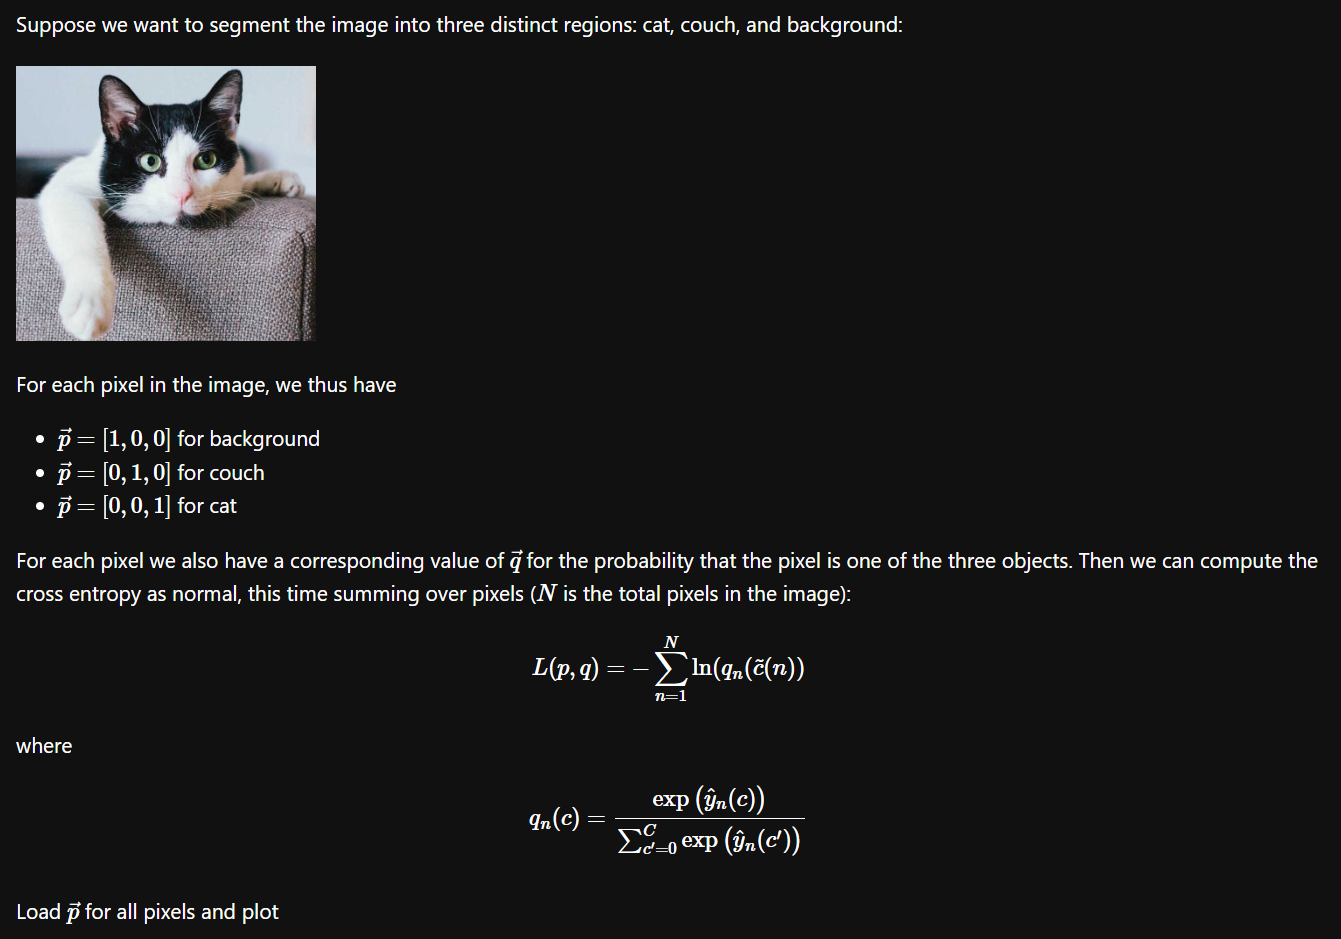

In [36]:
p = np.load('cat_p.npy')

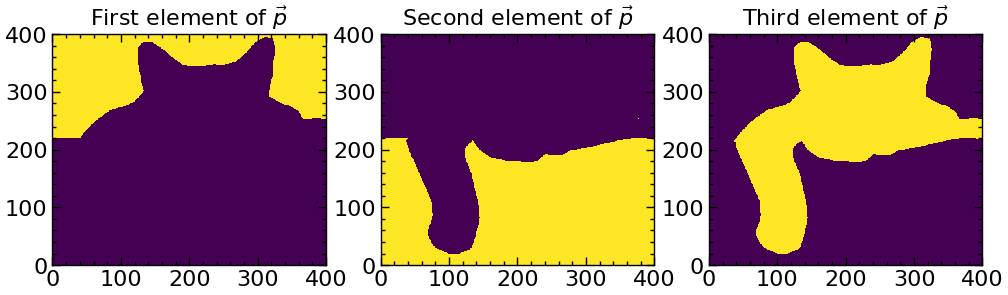

In [37]:
plt.subplots(1, 3, figsize=(12,3))
plt.subplot(131)
plt.pcolormesh(p[:,:,0])
plt.title(r'First element of $\vec{p}$')
plt.subplot(132)
plt.pcolormesh(p[:,:,1])
plt.title(r'Second element of $\vec{p}$')
plt.subplot(133)
plt.pcolormesh(p[:,:,2])
plt.title(r'Third element of $\vec{p}$')
plt.show()

Load $\hat y$ for all pixels and plot.

In [38]:
yhat = np.load('cat_q.npy')

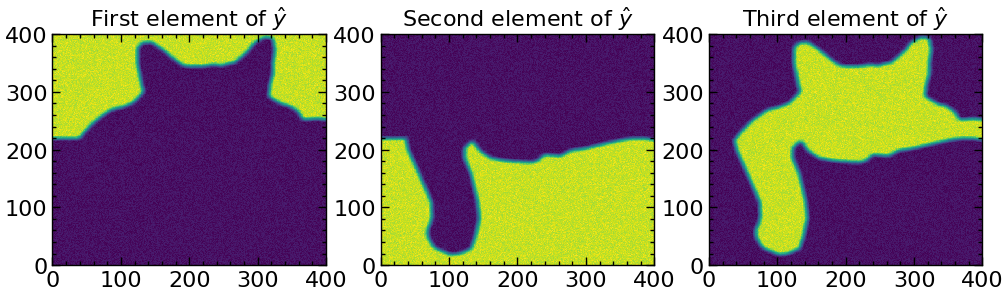

In [39]:
plt.subplots(1, 3, figsize=(12,3))
plt.subplot(131)
plt.pcolormesh(yhat[:,:,0])
plt.title(r'First element of $\hat{y}$')
plt.subplot(132)
plt.pcolormesh(yhat[:,:,1])
plt.title(r'Second element of $\hat{y}$')
plt.subplot(133)
plt.pcolormesh(yhat[:,:,2])
plt.title(r'Third element of $\hat{y}$')
plt.show()

Normalize $\hat y$ to get $\vec q$

In [40]:
q = np.exp(yhat)
q = q/np.expand_dims(np.sum(q, axis=-1), axis=-1)

Get $\tilde c(n)$ where $n$ specifies the particular pixel.

In [41]:
c_squig = np.where(p)

In [42]:
c_squig

(array([  0,   0,   0, ..., 399, 399, 399], dtype=int64),
 array([  0,   1,   2, ..., 397, 398, 399], dtype=int64),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64))

Compute Loss

In [43]:
Hs = -np.log(q[c_squig])
L = sum(Hs)
L

99746.60685154534

In [44]:
Hs.shape

(160000,)

Compare to pytorch

The yhat and p fed into the loss function need to have shape (B,C,H,W) where 
 is the batch size (1 single image fed in in our case) C is the number of classes, and H and W are the height and width of the images. Reshape as follows:

In [45]:
yhat_ = np.expand_dims(np.transpose(yhat,(2,1,0)), axis=0)
p_ = np.expand_dims(np.transpose(p,(2,1,0)), axis=0)

In [46]:
yhat_.shape

(1, 3, 400, 400)

In [47]:
L = torch.nn.CrossEntropyLoss(reduction='sum')
L(torch.tensor(yhat_), torch.tensor(p_, dtype=torch.float))

tensor(99746.6069, dtype=torch.float64)